In [2]:
import os
from dotenv import load_dotenv

load_dotenv()  # Load .env variables

api_key = os.getenv("OPENAI_API_KEY")  # Make sure the key name matches .env
# print("API Key:", api_key)  # Should print your actual API key



In [29]:
from dotenv import load_dotenv
load_dotenv()

True

In [32]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")

In [33]:
model.invoke("Is there anybody in there?")  # Should return a response

AIMessage(content="Yes, I'm here! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 13, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-b4ac960b-138a-4ea4-8c96-0572db4c1ca0-0', usage_metadata={'input_tokens': 13, 'output_tokens': 13, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [34]:
model.invoke("My name is Daniel")  # Should return a response


AIMessage(content='Nice to meet you, Daniel! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-46453dbb-76b5-41a1-ba2a-06e98c5041ab-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [35]:
model.invoke("What is my name?")  # Should return a response

AIMessage(content="I don't have access to personal information about individuals unless it has been shared with me in the course of our conversation. Therefore, I don't know your name. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 12, 'total_tokens': 51, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-b34183be-f686-400d-a6f0-fcd5ea23199c-0', usage_metadata={'input_tokens': 12, 'output_tokens': 39, 'total_tokens': 51, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [38]:
model.invoke(["My name is Daniel", "What is my name"])  # Should return a response

AIMessage(content='Your name is Daniel.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 19, 'total_tokens': 25, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-9e5e20ee-d3b5-48a5-975a-1400ea8e28ab-0', usage_metadata={'input_tokens': 19, 'output_tokens': 6, 'total_tokens': 25, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [41]:
from langgraph.graph import StateGraph, MessagesState, START

In [42]:
workflow = StateGraph(MessagesState)

In [44]:
def call_model(state: MessagesState):
    updated_messages = model.invoke(state["messages"])
    return {"messages": updated_messages}

In [46]:
workflow.add_node("model_node", call_model)

In [47]:
workflow.add_edge(START, "model_node")

In [48]:
from langgraph.checkpoint.memory import MemorySaver

In [49]:
memory = MemorySaver()

In [50]:
app = workflow.compile(memory)

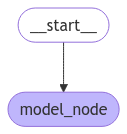

In [51]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())

In [56]:
# imports
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState, START
from langgraph.checkpoint.memory import MemorySaver

load_dotenv()

model = ChatOpenAI(model="gpt-4o-mini")   
                   
def call_model(state: MessagesState):
    updated_messages = model.invoke(state["messages"])
    return {"messages": updated_messages}

workflow = StateGraph(MessagesState)
workflow.add_node("model_node", call_model)
workflow.add_edge(START, "model_node")

memory = MemorySaver()
app = workflow.compile(memory)

In [64]:
chat_one = {"configurable": {"thread_id": 1}}
app.invoke({"messages": "My name is Daniel."}, chat_one)  # Should return a response


{'messages': [HumanMessage(content='My name is Daniel.', additional_kwargs={}, response_metadata={}, id='ac9c67d3-eace-47f7-a99a-744bdd320ae6'),
  AIMessage(content='Nice to meet you, Daniel! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 12, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-7a550bcb-a33d-4872-9e06-aaca6913d4ff-0', usage_metadata={'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='Is  anybody in there?', additional_kwargs={}, respo

In [65]:
app.invoke({"messages": "What is my name?"}, chat_one)  # Should return a response

{'messages': [HumanMessage(content='My name is Daniel.', additional_kwargs={}, response_metadata={}, id='ac9c67d3-eace-47f7-a99a-744bdd320ae6'),
  AIMessage(content='Nice to meet you, Daniel! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 12, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-7a550bcb-a33d-4872-9e06-aaca6913d4ff-0', usage_metadata={'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='Is  anybody in there?', additional_kwargs={}, respo

In [66]:
output = app.invoke(None, chat_one)  # Should return a response

In [68]:
[message.pretty_print() for message in output["messages"]]

================================ Human Message =================================

My name is Daniel.
================================== Ai Message ==================================

Nice to meet you, Daniel! How can I assist you today?
================================ Human Message =================================

Is  anybody in there?
================================== Ai Message ==================================

Yes, I'm here! What would you like to talk about?
================================ Human Message =================================

My name is Daniel
================================== Ai Message ==================================

Hi again, Daniel! How can I help you today?
================================ Human Message =================================

My name is Daniel.
================================== Ai Message ==================================

Hello again, Daniel! Is there something specific you'd like to discuss or ask about?
================================ 

[None, None, None, None, None, None, None, None, None, None]

In [69]:
chat_two = {"configurable": {"thread_id": 2}}

In [72]:
app.invoke({"messages": "What is the city where I live?"}, chat_two)["messages"][-1].content  # Should return a response


"I don't have information about your location or any personal details unless you share them with me. If you tell me the city where you live, I can provide information about it or help with anything related!"

In [78]:
def chatbot(chat_id: int):
    config = {"configurable": {"thread_id": chat_id}}

    while True:
        user_input = input("User:")

        if user_input in ["exit", "quit"]:
            print("AI: See you later!")
            break
        else:
            output = app.invoke({"messages": user_input}, config)
            print("AI:", output["messages"][-1].content, end="\n\n")

In [81]:
chatbot(3)

AI: Your name is Daniel! If there's anything else you'd like to discuss or ask, feel free to let me know.

AI: See you later!


In [82]:
chatbot(4)

AI: ChatGPT is a conversational AI model developed by OpenAI that is designed to understand and generate human-like text based on the input it receives. It is part of the GPT (Generative Pre-trained Transformer) family of models, which use a transformer architecture to process and generate language.

ChatGPT can assist users in a variety of tasks, including answering questions, providing explanations, generating creative writing, and engaging in casual conversation. It has been trained on a diverse range of internet text, which allows it to respond on a wide array of topics, although it does not have access to real-time information or personal data about individuals unless shared during the conversation.

The model aims to generate coherent and contextually relevant responses, but it may sometimes produce incorrect or nonsensical answers and lacks understanding or beliefs like a human would. User feedback is often used to improve its performance and safety in future updates.

AI: It lo

In [86]:
def chatbot(chat_id: int):
    config = {"configurable": {"thread_id": chat_id}}

    while True:
        user_input = input("User:")

        if user_input in ["exit", "quit"]:
            print("AI: See you later!")
            break
        else:
            print("AI: ", end="")
            for chunk, metadata in app.stream({"messages": user_input}, config, stream_mode = "messages"):
                print(chunk.content, end="", flush=True)
            print("\n")

In [87]:
chatbot(5)

AI: ChatGPT is an AI language model developed by OpenAI. It is designed to understand and generate human-like text based on the input it receives. Built on the GPT (Generative Pre-trained Transformer) architecture, ChatGPT is capable of engaging in conversations, answering questions, providing explanations, and assisting with a variety of tasks across numerous topics.

The model has been trained on a diverse range of internet text but does not have awareness or access to real-time data or specific documents. Its purpose is not just to provide information but also to assist and interact with users in a conversational manner, making it useful for applications like customer support, content creation, tutoring, and more. However, it also has limitations, including the potential for generating incorrect or nonsensical answers, and it should be used with an understanding of these constraints.

AI: Certainly! Here’s a more detailed overview of ChatGPT, including its architecture, capabilities